In [45]:
pwd

'C:\\Users\\Abhishek\\Desktop\\AppliedAI'

In [46]:
cd C:\Users\Abhishek\Desktop\AppliedAI

C:\Users\Abhishek\Desktop\AppliedAI


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## About the dataset
### in this dataset 1st column denote the age of the patient and 2nd column represent the year when operation is done
### 3rd column represent the no of nodes and 4th one represent the survival status of patient. 1 represent he can survive and 
### 2 represent he cant survive

In [59]:
#col_name=['Age','Operation_year','Nodes','Status']
df=pd.read_csv('haberman.csv')
df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Task
### As a ml engineer our task is to predict the status of the patient if we know age,operation year,no of node

In [60]:
df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [61]:
df.shape

(306, 4)

## Observation 
### This dataset have 4 column and 306 rows

In [62]:
df.describe()

,age,year,nodes,status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [64]:
df['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

## Obervation
### we can say  that 225 patient survive and unfortunatily 81 patient not survive
### and this dataset is balanced dataset

In [65]:
df.dtypes

age       int64
year      int64
nodes     int64
status    int64
dtype: object

### so here the datatype of each column is a string type of we have to convert all these value into int or float type

In [70]:
df[['age','year','nodes']]=df[['age','year','nodes']].astype(float)
df['status']=df['status'].astype('category')
df.dtypes

age        float64
year       float64
nodes      float64
status    category
dtype: object

## Univariate analysis

## Histogram and pdf

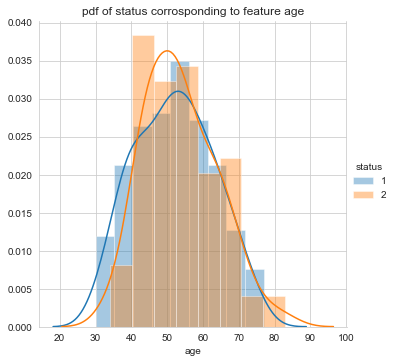

In [79]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',size=5).map(sns.distplot,'age',).add_legend()
plt.title('pdf of status corrosponding to feature age')
plt.show()

## Conclusion
### 1.This histogram is overlapping each other
### 2.peolpe of age range between 40 to 60 are more likely to die
### 3.people of age less than 40 more probable to survive

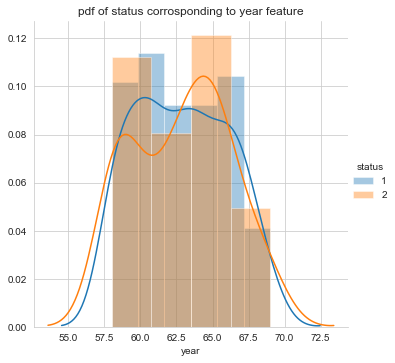

In [80]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',size=5).map(sns.distplot,'year').add_legend()
plt.title('pdf of status corrosponding to year feature')
plt.show()

## conclusion
### 1.From the plot we can say that there is immense overlapping betwwen these two class


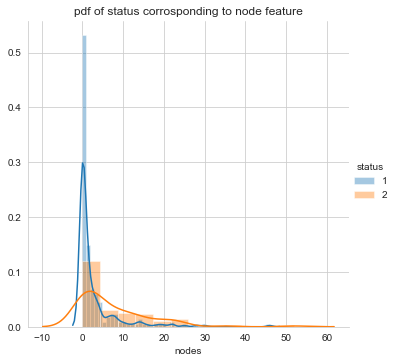

In [83]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',size=5).map(sns.distplot,'nodes').add_legend()
plt.title('pdf of status corrosponding to node feature')
plt.show()

## Conclusion
### 1.partially overlapping between these two class
### 2.we can say that patient with 0 axil node survive

## Univariate analysis using cdf 

In [103]:
class_1=df.loc[df['status']==1]
class_2=df.loc[df['status']==2]


[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


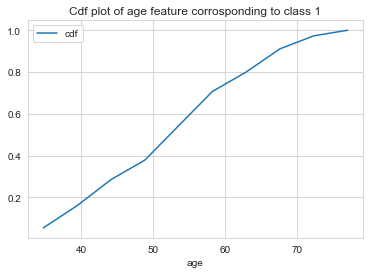

In [146]:
#plotting age feature corrosponding to class 1
counts,bin_edges=np.histogram(class_1['age'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('age')
plt.title('Cdf plot of age feature corrosponding to class 1')
plt.legend()
plt.show()


#conclusion
# it is clear that patient having age between 50 to 60 have greater rate of survival 
# Almost 90% who survived have the age less than or equal to 70


[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


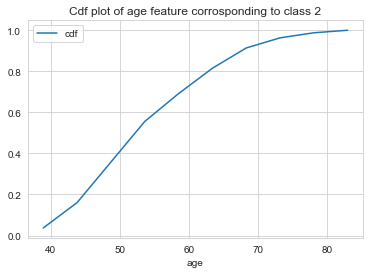

In [147]:
#plotting age feature corrosponding to class 2
counts,bin_edges=np.histogram(class_2['age'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('age')
plt.title('Cdf plot of age feature corrosponding to class 2')
plt.legend()
plt.show()


# conclusion 
# about 70% patient who died within 5 years have age equal to 60 yrs or less than 60 yrs

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


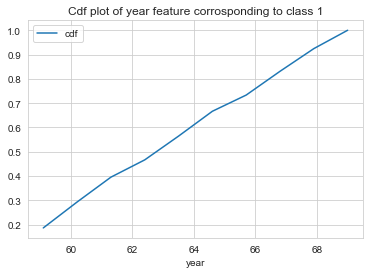

In [151]:
##plotting operation year feature corrosponding to class 1
counts,bin_edges=np.histogram(class_1['year'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('year')
plt.title('Cdf plot of year feature corrosponding to class 1')
plt.legend()
plt.show()

## conclusion
### about 60% patient those who survive their operation is done in before 1964

[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


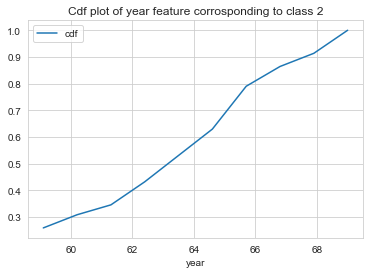

In [152]:
counts,bin_edges=np.histogram(class_2['year'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('year')
plt.title('Cdf plot of year feature corrosponding to class 2')
plt.legend()
plt.show()

## conclusion
###  about 90% patient who die there operation is done before 1968

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


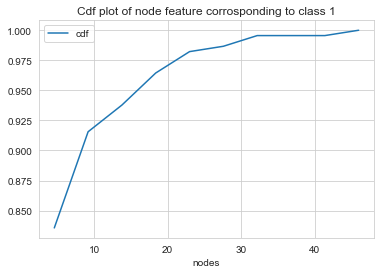

In [154]:
counts,bin_edges=np.histogram(class_1['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('nodes')
plt.title('Cdf plot of node feature corrosponding to class 1')
plt.legend()
plt.show()

## conclusion
### about 90% patient survive those have axil node 8.hence we can say that as much as the number of axil node in low the survival \
### chance increase


counts,bin_edges=np.histogram(class_2['nodes'],bins=10,density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.xlabel('nodes')
plt.title('Cdf plot of node feature corrosponding to class 2')
plt.legend()
plt.show()

In [ ]:
#conclusion
#

### Mean median and standard deviation

In [99]:
#Mean, Variance, Std-deviation of age attribute  
print('Mean of age attribute: ',np.mean(df["age"]))
print('median of age :',np.median(df['age']))
print('std_dev of age: ',np.std(df.age))
print('******************')
#Mean, Variance, Std-deviation of year attribute  
print("Mean of  year: ",np.mean(df['year']))
print('median of year :',np.median(df['year']))
print('std of  year: ',np.std(df['year']))




Mean of age attribute:  52.45751633986928
median of age : 52.0
std_dev of age:  10.78578520363183
******************
Mean of  year:  62.85294117647059
median of year : 63.0
std of  year:  3.244090833563246


## Box plot

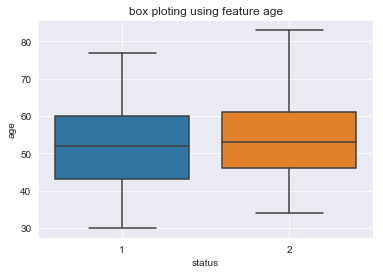

In [124]:
sns.set_style('dark')
sns.boxplot(x='status',y='age',data=df)
plt.grid()
plt.title('box ploting using feature age')
plt.show()

## conclusion
### 50% data point who survive their age belong between 43 to 60
### 50% data point who die their age belong between 46 to 62
### from the box plot we can say that about 90 data overlap between these these box plot with same 
### median(~).Hence we can say that age feature is not sufficent to predict survival status

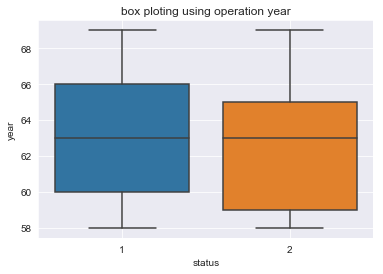

In [125]:
sns.set_style('dark')
sns.boxplot(x='status',y='year',data=df)
plt.grid()
plt.title('box ploting using operation year')
plt.show()


## Conclusion
### from the box plot we can say that about 80 data overlap between these these box plot with same 
### median(~).Hence we can say that operation year feature is not sufficent to predict survival status

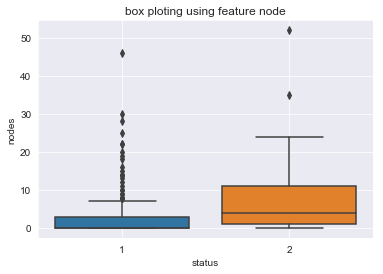

In [127]:
sns.set_style('dark')
sns.boxplot(x='status',y='nodes',data=df)
plt.grid()
plt.title('box ploting using feature node')
plt.show()


## Conclusion
### class_1(those who survive) have outlier but 50% survive those whose axil node no is less than 3

## Violin plot

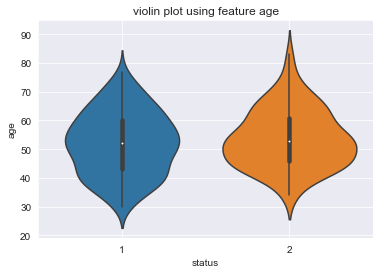

In [129]:
sns.violinplot(x='status',y='age',data=df)
plt.grid()
plt.title('violin plot using feature age')
plt.show()

## Conclusion 
### overlapping is seen upto 90% between both the class .so age feature is not sufficient to predict 
###  the survival status

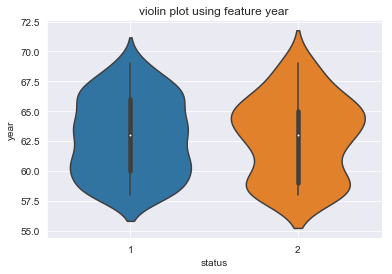

In [131]:
sns.violinplot(x='status',y='year',data=df)
plt.grid()
plt.title('violin plot using feature year')
plt.show()

## conclusion
### here we also see about 90% datapoint overlap so we cant say operation year is sufficient to predict 
### survival status

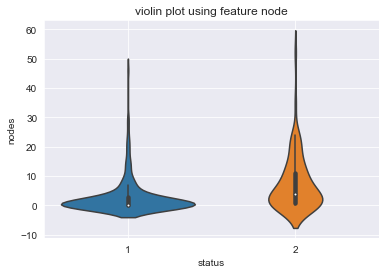

In [134]:
sns.violinplot(x='status',y='nodes',data=df)
plt.grid()
plt.title('violin plot using feature node')
plt.show()

## Conclusion
### The survived patient having axil node equal to zero
### patient who died had axil node greater than or equal to 1,and as the concentration of
### axil node increased the patient is more likely to die

## Bivariate analysis

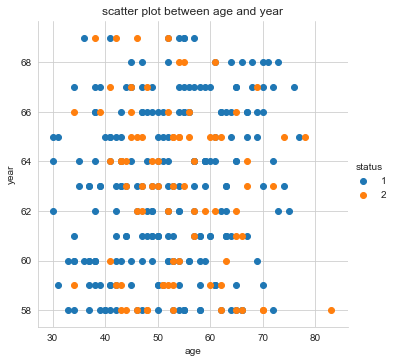

In [136]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',size=5).map(plt.scatter,'age','year').add_legend()
plt.title('scatter plot between age and year')
plt.show()

## Conclusion 
### their is about 90% overlap.so we cant separate the survival of patient on the basis of age and operation year

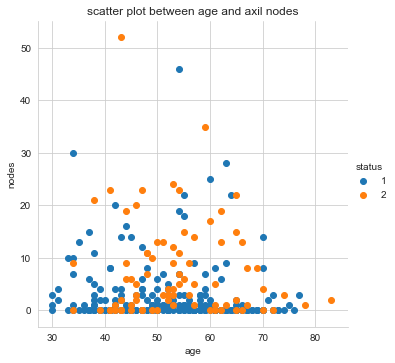

In [138]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',size=5).map(plt.scatter,'age','nodes').add_legend()
plt.title('scatter plot between age and axil nodes')
plt.show()

## Conclusion
### there is also a hue overlap about 90%.so we cant seperate survival of patient on the basis of age and axil node

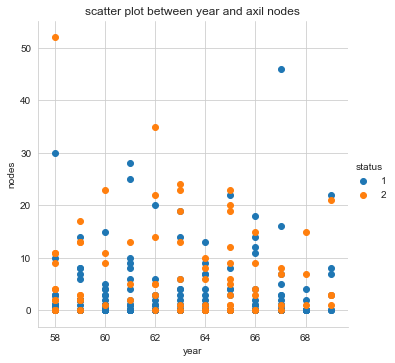

In [140]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='status',size=5).map(plt.scatter,'year','nodes').add_legend()
plt.title('scatter plot between year and axil nodes')
plt.show()

## Conclusion
### there is also a hue overlap about (80 to 90)%.so we cant seperate survival of patient on the basis of age and axil node

## Pair plot

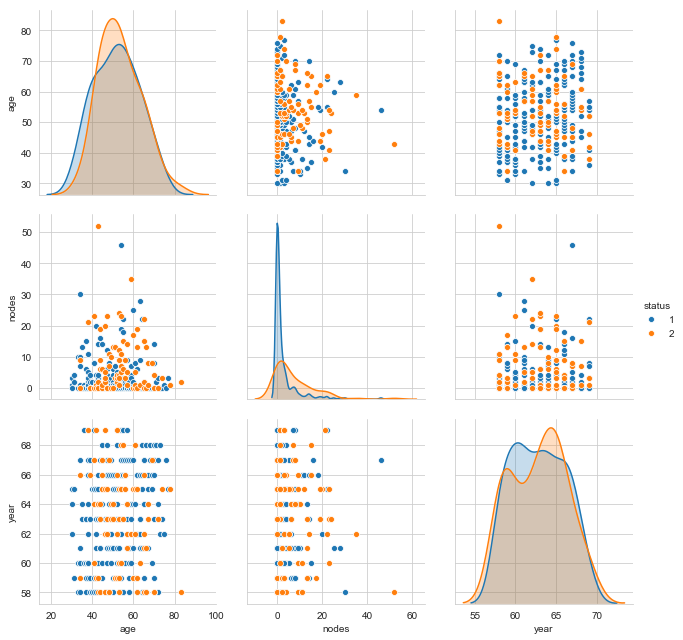

In [143]:
plt.close();
sns.set_style("whitegrid");
sns.pairplot(df, hue="status", size=3,x_vars=['age','nodes','year'],y_vars=['age','nodes','year']);
plt.show()

## Conclusion
### it is very difficult to predict the survival of the patient who had undergone for cancer on thebasis
### of these three feature because both the class about 80 to 90% overlapping each other
### These two classes are linearly inseperable due to immense overlapping
### we should collect more useful feature which are helpful to predict the survival of the patient
### we need non_linear model then only we can predict the survival of the patient
### order of usefullness of the feature is axil_node>operation_year>age